In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
fcn8s_pd = pd.read_csv('results_fcn8s.csv')
fcn8s_pd

,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8,model
0,0.342284,0.482713,0.534252,0.488004,0.162108,0.024922,0.021108,0.000905,0.296177,0.538397,0.47766,0.472319,0.158344,0.020946,0.019576,0.001154,fcn8s


In [3]:
fpn_pd = pd.read_csv('results_fpn.csv')
fpn_pd

,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8,model
0,0.643695,0.737693,0.756532,0.766281,0.609184,0.528928,0.502179,0.375862,0.51602,0.777568,0.656031,0.69944,0.494889,0.368847,0.396739,0.241798,fpn


In [4]:
unet_pd = pd.read_csv('results_unet.csv')
unet_pd

,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8,model
0,0.006525,0.062336,0.131812,0.005122,0.001313,0.00024,0.010254,0.003772,0.006813,0.07001,0.109288,0.00516,0.001267,0.000266,0.00867,0.004331,unet


In [5]:
def print_iou(dataframe):
  # train and test
  print(dataframe[dataframe.columns[0: 8]].T.mean().values, dataframe[dataframe.columns[8: 16]].T.mean().values)

In [6]:
print_iou(fpn_pd)

[0.61504409] [0.51891661]


In [7]:
print_iou(fcn8s_pd)

[0.25703698] [0.2480716]


In [8]:
results_all = pd.concat([fpn_pd, fcn8s_pd])

In [9]:
results_all.melt(id_vars='model')

,model,variable,value
0,fpn,trainc1,0.643695
1,fcn8s,trainc1,0.342284
2,fpn,trainc2,0.737693
3,fcn8s,trainc2,0.482713
4,fpn,trainc3,0.756532
5,fcn8s,trainc3,0.534252
6,fpn,trainc4,0.766281
7,fcn8s,trainc4,0.488004
8,fpn,trainc5,0.609184
9,fcn8s,trainc5,0.162108


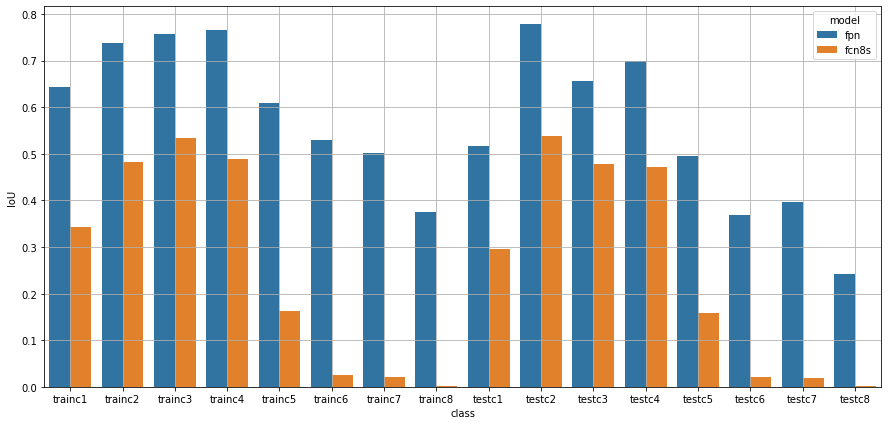

In [10]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=results_all.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

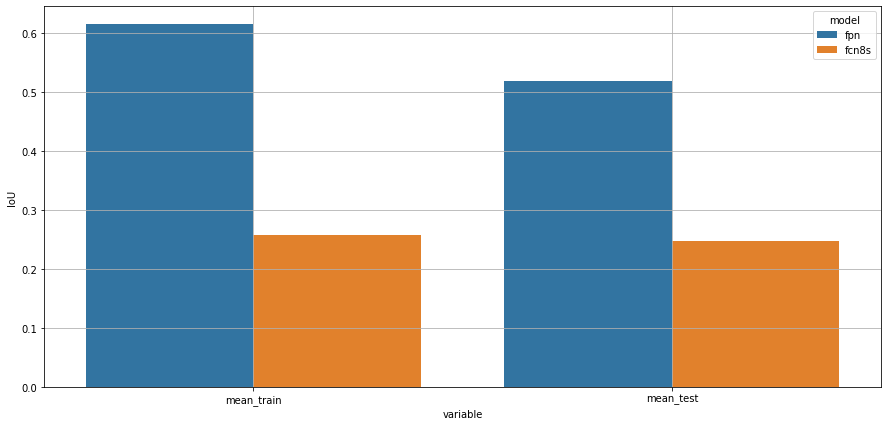

In [50]:
mean_results = results_all.copy()
mean_results['mean_train'] = results_all.iloc[:,0:8].mean(axis=1)
mean_results['mean_test'] = results_all.iloc[:,8:16].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()